# **1. IMPORT LIBRARIES**

In [1]:
# Libraries for data manipulation and visualization
import pandas as pd  # For handling datasets in tabular format
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For statistical visualizations

# Libraries for loading dataset and machine learning
from sklearn.datasets import load_breast_cancer  # Dataset of breast cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Data splitting and hyperparameter tuning
from sklearn.preprocessing import StandardScaler  # Feature scaling (normalization)
from sklearn.ensemble import RandomForestClassifier  # Random Forest algorithm
from sklearn.linear_model import LogisticRegression  # Logistic Regression algorithm
from sklearn.svm import SVC  # Support Vector Machine (SVM) algorithm

# Libraries for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc  # Evaluation metrics

# **2. LOAD DATASET**

In [2]:
# Load the breast cancer dataset from scikit-learn
breast_cancer = load_breast_cancer()

# Extract features (X) and target variable (y)
X = breast_cancer.data   # Features representing tumor measurements
y = breast_cancer.target  # Target variable: 0 = Malignant (dangerous), 1 = Benign (non-dangerous)

# Convert data into pandas DataFrame for easier analysis
df_X = pd.DataFrame(X, columns=breast_cancer.feature_names)  # Feature data as DataFrame
df_y = pd.Series(y, name="target")  # Target variable as pandas Series
df = pd.concat([df_X, df_y], axis=1)  # Combine features and target into one DataFrame

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [3]:
# Display information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoo

# **3. Data Preprocessing**

In [8]:
# Check for missing values
print("\nMissing Values in the Dataset:")
df.isnull().sum()


Missing Values in the Dataset:


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [9]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
# Standardize the features using StandardScaler
# Standardization ensures that all features are on the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Standardize training data
X_test = scaler.transform(X_test)  # Standardize testing data

# **4. Exploratory Data Analysis (EDA)**

In [4]:
# Display descriptive statistics of numerical features
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
# Display the unique values and their counts in the target variable
print("\nTarget Variable (Unique Values):", df['target'].unique())
print("Target Distribution:")
df['target'].value_counts()


Target Variable (Unique Values): [0 1]
Target Distribution:


,count
target,
1,357
0,212


<ipython-input-6-8f26adcda66e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette=["#444876", "#afdad2"])


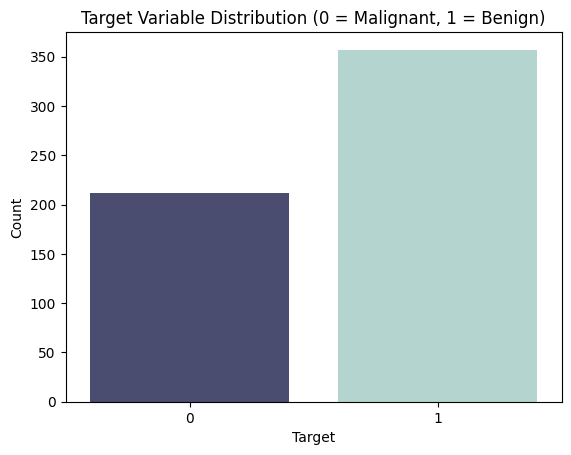

In [6]:
# Visualize the distribution of the target variable (Malignant vs Benign)
sns.countplot(x="target", data=df, palette=["#444876", "#afdad2"])
plt.title("Target Variable Distribution (0 = Malignant, 1 = Benign)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

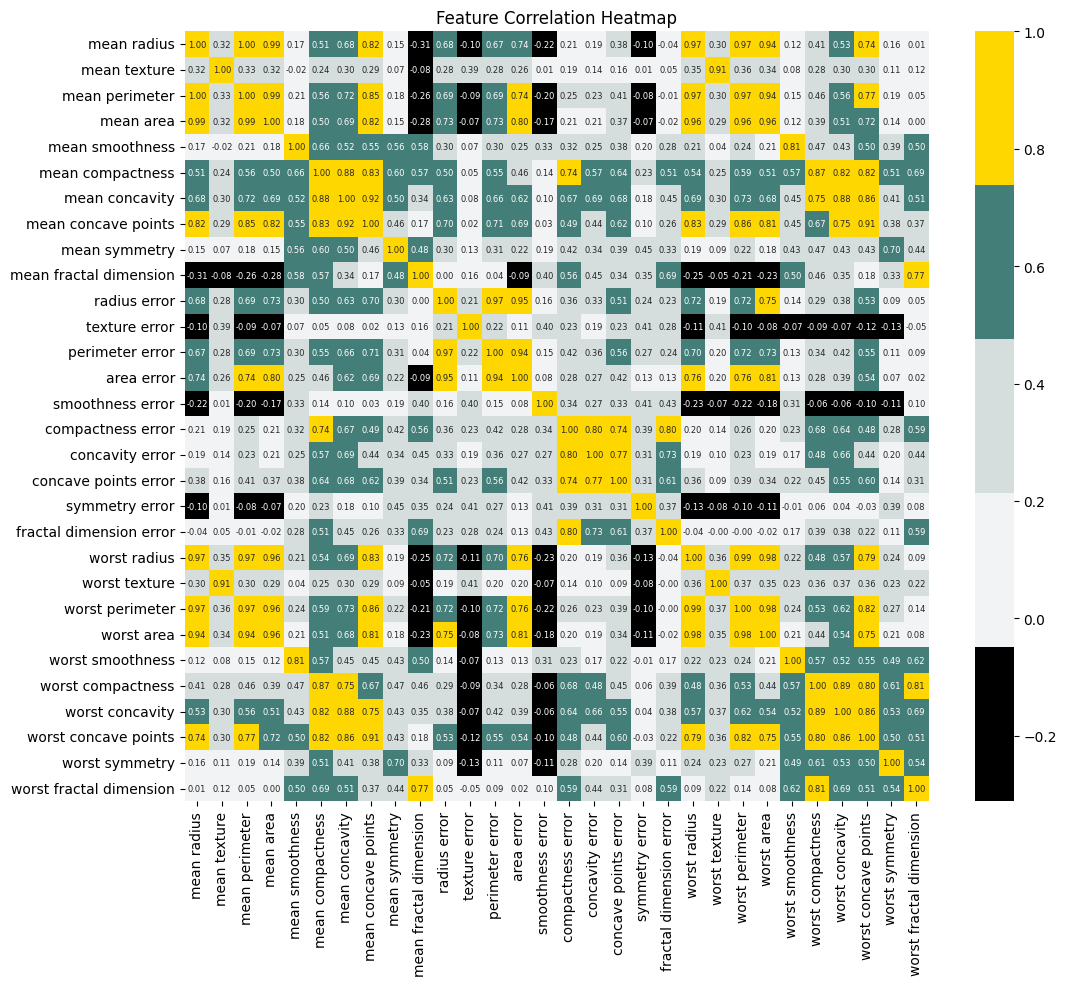

In [7]:
# Compute the correlation matrix between features
corr_matrix = df_X.corr()

# Define a custom colormap based on extracted colors
custom_cmap = sns.color_palette(['#000000', '#F2F3F5', '#D6DDDD', '#447E78', '#FFD700'], as_cmap=True)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap=custom_cmap, annot=True, annot_kws={"size": 6}, fmt=".2f", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# **5. TRAIN THE MODELS**

In [11]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [12]:
# Train a Random Forest model with hyperparameter tuning
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees in the forest
    "max_depth": [None, 10, 20],  # Maximum depth of the trees
    "min_samples_split": [2, 5, 10]  # Minimum samples required to split an internal node
}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
rf_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [13]:
# Train a Support Vector Machine (SVM) model with a linear kernel
svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

# **6. PREDICT AND EVALUATE MODELS**

In [14]:
# Create a dictionary to store the trained models
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model.best_estimator_,
    "Support Vector Machine": svm_model
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}\n")

Logistic Regression Cross-Validation Accuracy: 0.98 ± 0.01

Random Forest Cross-Validation Accuracy: 0.96 ± 0.02

Support Vector Machine Cross-Validation Accuracy: 0.97 ± 0.01




Logistic Regression - Model Performance:
Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



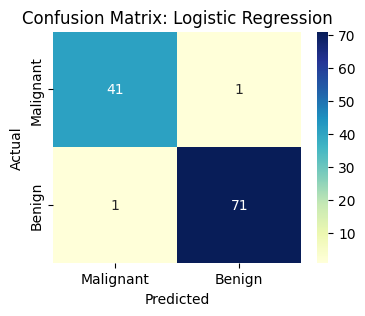


Random Forest - Model Performance:
Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



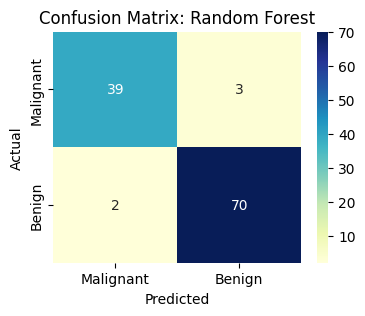


Support Vector Machine - Model Performance:
Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



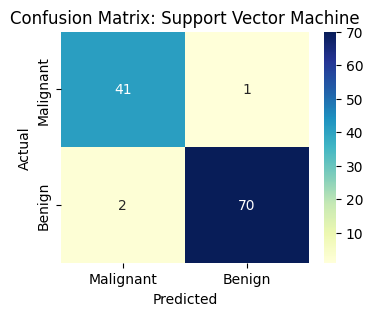

In [15]:
# Predict and evaluate each model on the testing set
for name, model in models.items():
    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Display evaluation metrics
    print(f"\n{name} - Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

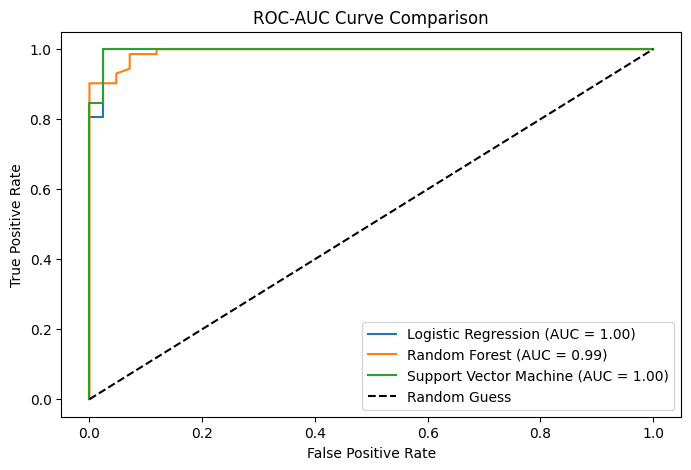

In [17]:
# Plot the ROC-AUC curve for all models
plt.figure(figsize=(8, 5))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")  # Diagonal line
plt.title("ROC-AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

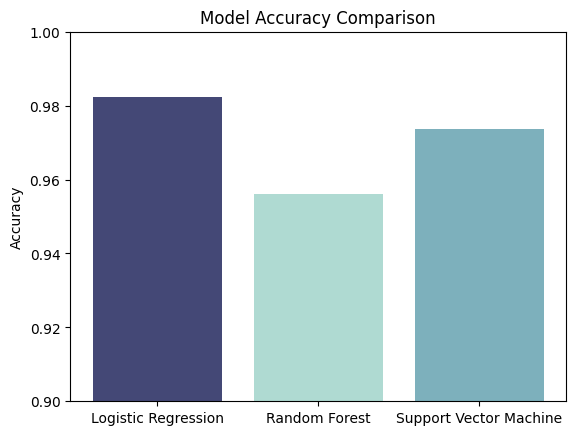

In [21]:
# Plot a bar chart comparing the accuracy of the models
accuracies = {
    "Logistic Regression": accuracy_score(y_test, log_reg.predict(X_test)),
    "Random Forest": accuracy_score(y_test, rf_model.best_estimator_.predict(X_test)),
    "Support Vector Machine": accuracy_score(y_test, svm_model.predict(X_test))
}

# Define the colors based on the image
colors = ["#444876", "#afdad2", "#7db0bc"]

plt.bar(accuracies.keys(), accuracies.values(), color=colors)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()

# **7. Data Visualization**

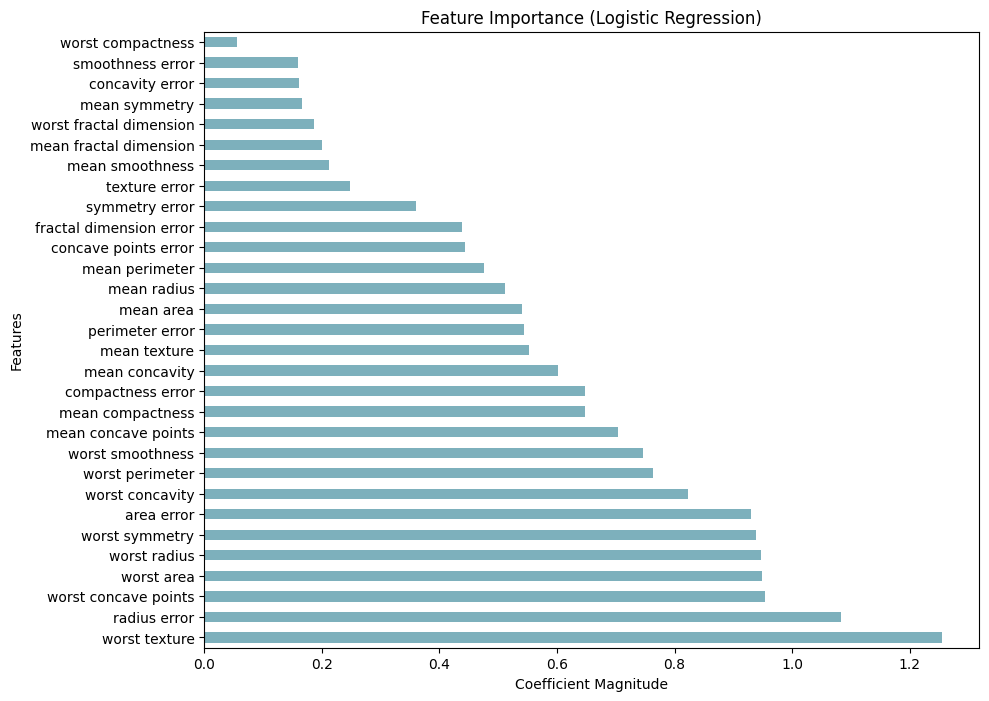

In [18]:
# Extract coefficients from Logistic Regression model
log_coef = pd.Series(log_reg.coef_[0], index=breast_cancer.feature_names)

# Sort features based on absolute coefficient values (for better interpretation)
log_coef_sorted = log_coef.abs().sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 8))
log_coef_sorted.plot(kind='barh', color='#7db0bc')
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.show()

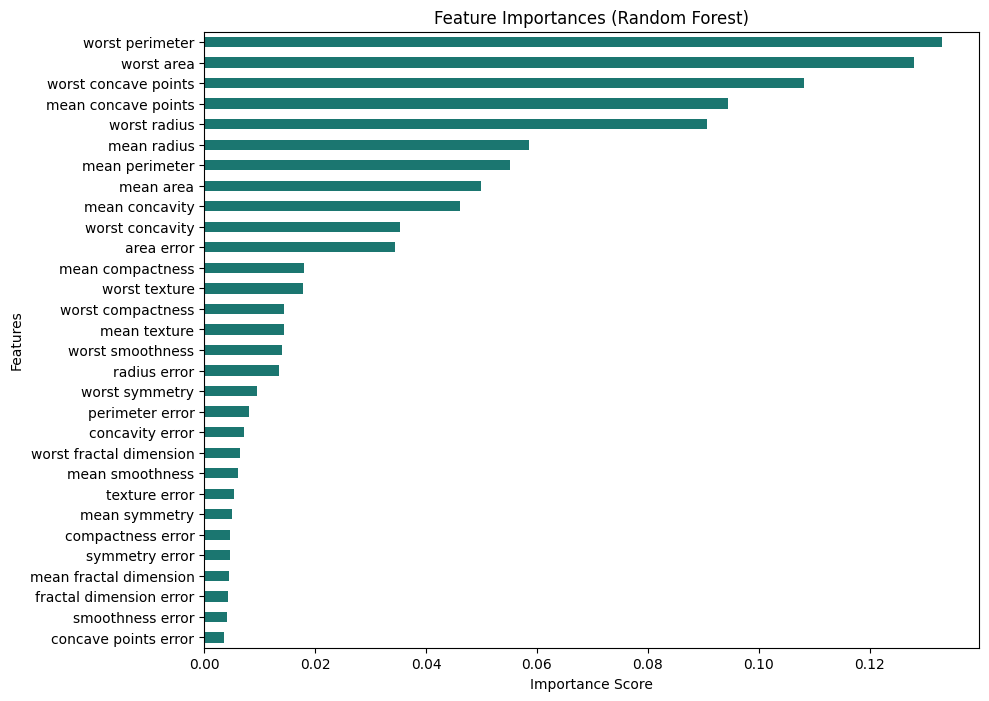

In [19]:
# Feature Importance for Random Forest
feature_importances = pd.Series(rf_model.best_estimator_.feature_importances_, index=breast_cancer.feature_names)
feature_importances.sort_values(ascending=True).plot(kind="barh", figsize=(10, 8), color="#1b7670")
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

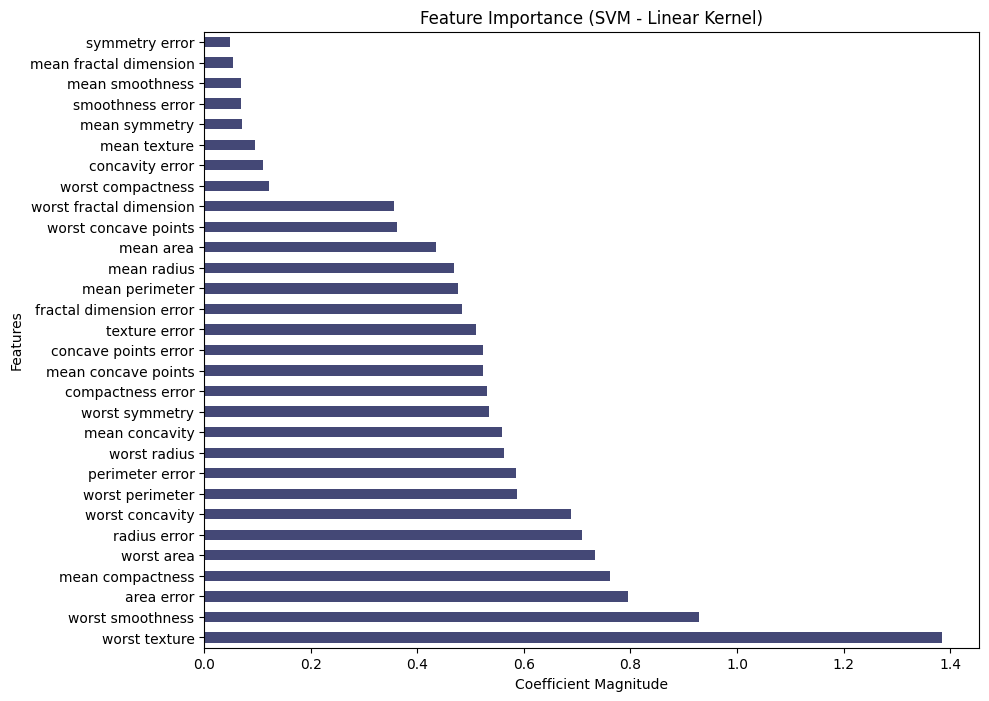

In [20]:
# Extract coefficients from SVM model
svm_coef = pd.Series(svm_model.coef_[0], index=breast_cancer.feature_names)

# Sort features based on absolute coefficient values
svm_coef_sorted = svm_coef.abs().sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 8))
svm_coef_sorted.plot(kind='barh', color='#444876')
plt.title("Feature Importance (SVM - Linear Kernel)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.show()

# **8. Conclusion**

In [22]:
# Calculate the accuracy of all models
accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}

# Find the highest accuracy score among all models
max_accuracy = max(accuracies.values())

# Select all models that have the highest accuracy
best_models = [name for name, acc in accuracies.items() if acc == max_accuracy]

# Display the best-performing models and their accuracy
print(f"\nThe best models based on accuracy are: {', '.join(best_models)} with accuracy: {max_accuracy:.4f}")


The best models based on accuracy are: Logistic Regression with accuracy: 0.9825
